# Chapter 10 기호 수식 다루기

## 10.1 컴퓨터 대수 시스템으로 정확한 도함수 구하기

### 10.1.1 파이썬에서 기호 대수 하기

In [1]:
from math import sin
def f(x):
    return (3*x**2 + x) * sin(x)

## 10.2 대수식 모델링하기

### 10.2.3 수식 트리를 파이썬 언어로 번역하기

In [2]:
class Power():
    def __init__(self,base,exponent):
        self.base = base
        self.exponent = exponent

In [3]:
class Number():
    def __init__(self,number):
        self.number = number

class Variable():
    def __init__(self,symbol):
        self.symbol = symbol

This represents $x^2$:

In [4]:
Power(Variable("x"),Number(2))

In [5]:
class Product():
    def __init__(self, exp1, exp2):
        self.exp1 = exp1
        self.exp2 = exp2

This represents $3x^2$:

In [6]:
Product(Number(3),Power(Variable("x"),Number(2)))

In [7]:
class Sum():
    def __init__(self, *exps): #<1>
        self.exps = exps

class Function(): #<2>
    def __init__(self,name):
        self.name = name

class Apply(): #<3>
    def __init__(self,function,argument):
        self.function = function
        self.argument = argument

f_expression = Product( #<4>
                Sum(
                    Product(
                        Number(3),
                        Power(
                            Variable("x"),
                            Number(2))), 
                    Variable("x")), 
                Apply(
                    Function("sin"),
                    Variable("x")))

This represents $\cos(x^3+ -5)$:

In [8]:
Apply(Function("cos"),Sum(Power(Variable("x"),Number("3")), Number(-5)))

### 10.2.4 연습문제

### 연습문제 10.1
여러분은 $\ln(x)$라고 표기하는 자연 로그(natural logarithm) 함수를 본 적이 있을 것이다. 앞절에서 묘사한 원소와 컴비네이터를 사용해 수식 $\ln(y^2)$을 트리로 그려라.

#### 가장 바깥쪽에는 Apply 컴비네이터가 있다. 적용하는 함수는 자연로그 $\ln$이며 인자는 $y^z$이다. 한편, $y^z$는 밑이 $y$이고 지수가 $z$인 거듭제곱(Power)이다.

### 연습문제 10.2
[연습문제 10.1]의 수식을 파이썬 코드로 번역하되 자연로그는 파이썬 함수 `math.log`로 계산한다고 가정하라. 이 수식을 파이썬 함수로 작성하고 원소와 컴비네이터로 만든 자료구조로도 작성하라.

In [9]:
from math import log
def f(y,z):
    return log(y**z)

In [10]:
Apply(Function("ln"), Power(Variable("y"), Variable("z")))

### 연습문제 10.3
`Product(Number(3), Sum(Variable('y'), Variable('z')))`로 표현되는 수식을 구하라.

#### 이 수식은 $3 \cdot (y + z)$를 나타낸다. 연산 순서를 고려하여 괄호를 표기하였다.

### 연습문제 10.4
한 수식을 다른 수식으로 나누는 나눗셈(Quotient) 컴비네이터를 구현하라. 다음 식을 나눗셈 컴비네이터를 이용해 나타내라.
$$ \frac{a+b}{2} $$

In [11]:
class Quotient():
    def __init__(self,numerator,denominator):
        self.numerator = numerator
        self.denominator = denominator

In [12]:
Quotient(Sum(Variable("a"),Variable("b")),Number(2))

### 연습문제 10.5
한 수식과 다른 수식의 뺄셈을 나타내는 차(Difference) 컴비네이터를 구현하라. $b^2-4ac$를 이 컴비네이터로 표현하라.

In [13]:
class Difference():
    def __init__(self,exp1,exp2):
        self.exp1 = exp1
        self.exp2 = exp2

In [14]:
Difference(
    Power(Variable('b'),Number(2)),
    Product(Number(4),Product(Variable('a'), Variable('c'))))

### 연습문제 10.6
수식에 음의 기호를 붙이는 부정(Negative) 컴비네이터를 구현하라. 예를 들어 $x^2+y$의 부정은 $-(x^2+y)$이다. 새로운 컴비네이터를 사용해 코드로 수식 $-(x^2+y)$를 나타내어라.

In [15]:
class Negative():
    def __init__(self,exp):
        self.exp = exp

In [16]:
Negative(Sum(Power(Variable("x"),Number(2)),Variable("y")))

### 연습문제 10.7
제곱근을 나타내는 `Sqrt`라는 함수를 추가하고 이 함수를 사용해 다음 수식을 코드화하라.
$$ \frac{-b \pm \sqrt{b^2 - 4ac}}{2a} $$

In [17]:
A = Variable('a')
B = Variable('b')
C = Variable('c')
Sqrt = Function('sqrt')

In [18]:
Quotient(
    Sum(
        Negative(B),
        Apply(
            Sqrt, 
            Difference(
                Power(B,Number(2)),
                Product(Number(4), Product(A,C))))),
    Product(Number(2), A))

### 연습문제 10.8 (Mini-project)
`Expression`이라는 추상 베이스 클래스를 만들어 모든 원소와 컴비네이터가 상속받도록 하라. 예를 들어 `class Variable()`은 `class Variable(Expression)`이다. 그 뒤, 파이썬 산술 연산자 $+, -, *, /$을 `Expression` 객체를 생성하도록 오버로딩하라. 예를 들어 코드 `2*Variable("x")+3`은 `Sum(Product(Number(2),Variable("X")),Number(3))`이다.

**Solution:** see "expressions.py" file, and section 2.2 and beyond below.

## 10.3 기호 수식 동작하게 하기

### 10.3.1 수식 내의 모든 변수 찾기

In [19]:
def distinct_variables(exp):
    if isinstance(exp, Variable):
        return set(exp.symbol)
    elif isinstance(exp, Number):
        return set()
    elif isinstance(exp, Sum):
        return set().union(*[distinct_variables(exp) for exp in exp.exps])
    elif isinstance(exp, Product):
        return distinct_variables(exp.exp1).union(distinct_variables(exp.exp2))
    elif isinstance(exp, Power):
        return distinct_variables(exp.base).union(distinct_variables(exp.exponent))
    elif isinstance(exp, Apply):
        return distinct_variables(exp.argument)
    else:
        raise TypeError("Not a valid expression.")

In [20]:
distinct_variables(Variable("z"))

{'z'}

In [21]:
distinct_variables(Number(3))

set()

In [22]:
distinct_variables(f_expression)

{'x'}

### 10.3.2 수식의 값 구하기

In [23]:
from abc import ABC, abstractmethod

class Expression(ABC):
    @abstractmethod
    def evaluate(self, **bindings):
        pass

In [24]:
class Number(Expression):
    def __init__(self,number):
        self.number = number
    def evaluate(self, **bindings):
        return self.number
    
class Variable(Expression):
    def __init__(self,symbol):
        self.symbol = symbol
    def evaluate(self, **bindings):
        try:
            return bindings[self.symbol]
        except:
            raise KeyError("Variable '{}' is not bound.".format(self.symbol))
            
class Product(Expression):
    def __init__(self, exp1, exp2):
        self.exp1 = exp1
        self.exp2 = exp2
    def evaluate(self, **bindings):
        return self.exp1.evaluate(**bindings) * self.exp2.evaluate(**bindings)

In [25]:
Product(Variable("x"), Variable("y")).evaluate(x=2,y=5)

10

In [26]:
import math
from math import sin, cos, log

_function_bindings = {
    "sin": math.sin,
    "cos": math.cos,
    "ln": math.log
}

class Apply(Expression):
    def __init__(self,function,argument):
        self.function = function
        self.argument = argument
    def evaluate(self, **bindings):
        return _function_bindings[self.function.name](self.argument.evaluate(**bindings))

From the text: ... Similarly, we can add an “evaluate” method to the Sum, Power, Difference, or Quotient combinators....

In [27]:
class Sum(Expression):
    def __init__(self, *exps):
        self.exps = exps
    def evaluate(self, **bindings):
        return sum([exp.evaluate(**bindings) for exp in self.exps])
    
class Power(Expression):
    def __init__(self,base,exponent):
        self.base = base
        self.exponent = exponent
    def evaluate(self, **bindings):
        return self.base.evaluate(**bindings) ** self.exponent.evaluate(**bindings)
    
class Difference(Expression):
    def __init__(self,exp1,exp2):
        self.exp1 = exp1
        self.exp2 = exp2
    def evaluate(self, **bindings):
        return self.exp1.evaluate(**bindings) - self.exp2.evaluate(**bindings)
    
class Quotient(Expression):
    def __init__(self,numerator,denominator):
        self.numerator = numerator
        self.denominator = denominator
    def evaluate(self, **bindings):
        return self.numerator.evaluate(**bindings) / self.denominator.evaluate(**bindings)

Redefine `f_expression` in light of the new class definitions

In [28]:
f_expression = Product( #<4>
                Sum(
                    Product(
                        Number(3),
                        Power(
                            Variable("x"),
                            Number(2))), 
                    Variable("x")), 
                Apply(
                    Function("sin"),
                    Variable("x")))

In [29]:
f_expression.evaluate(x=5)

-76.71394197305108

In [30]:
from math import sin
def f(x):
    return (3*x**2 + x) * sin(x)

f(5)

-76.71394197305108

### 10.3.3 수식 전개하기

In [31]:
class Expression(ABC):
    @abstractmethod
    def evaluate(self, **bindings):
        pass
    @abstractmethod
    def expand(self):
        pass
    
    # Printing expressions legibly in REPL (See first mini project in 2.4)
    @abstractmethod
    def display(self):
        pass
    def __repr__(self):
        return self.display()

In [32]:
class Sum(Expression):
    def __init__(self, *exps):
        self.exps = exps
    def evaluate(self, **bindings):
        return sum([exp.evaluate(**bindings) for exp in self.exps])
    def expand(self):
        return Sum(*[exp.expand() for exp in self.exps])
    def display(self):
        return "Sum({})".format(",".join([e.display() for e in self.exps]))
    
class Product(Expression):
    def __init__(self, exp1, exp2):
        self.exp1 = exp1
        self.exp2 = exp2
    def evaluate(self, **bindings):
        return self.exp1.evaluate(**bindings) * self.exp2.evaluate(**bindings)
    def expand(self):
        expanded1 = self.exp1.expand()
        expanded2 = self.exp2.expand()
        if isinstance(expanded1, Sum):
            return Sum(*[Product(e,expanded2).expand() for e in expanded1.exps])
        elif isinstance(expanded2, Sum):
            return Sum(*[Product(expanded1,e) for e in expanded2.exps])
        else:
            return Product(expanded1,expanded2)
    def display(self):
        return "Product({},{})".format(self.exp1.display(),self.exp2.display())
        
class Difference(Expression):
    def __init__(self,exp1,exp2):
        self.exp1 = exp1
        self.exp2 = exp2
    def evaluate(self, **bindings):
        return self.exp1.evaluate(**bindings) - self.exp2.evaluate(**bindings)
    def expand(self):
        return self
    def display(self):
        return "Difference({},{})".format(self.exp1.display(), self.exp2.display())
    
class Quotient(Expression):
    def __init__(self,numerator,denominator):
        self.numerator = numerator
        self.denominator = denominator
    def evaluate(self, **bindings):
        return self.numerator.evaluate(**bindings) / self.denominator.evaluate(**bindings)
    def expand(self):
        return self
    def display(self):
        return "Quotient({},{})".format(self.numerator.display(),self.denominator.display())
    
class Negative(Expression):
    def __init__(self,exp):
        self.exp = exp
    def evaluate(self, **bindings):
        return - self.exp.evaluate(**bindings)
    def expand(self):
        return self
    def display(self):
        return "Negative({})".format(self.exp.display())
    
class Number(Expression):
    def __init__(self,number):
        self.number = number
    def evaluate(self, **bindings):
        return self.number
    def expand(self):
        return self
    def display(self):
        return "Number({})".format(self.number)
    
class Power(Expression):
    def __init__(self,base,exponent):
        self.base = base
        self.exponent = exponent
    def evaluate(self, **bindings):
        return self.base.evaluate(**bindings) ** self.exponent.evaluate(**bindings)
    def expand(self):
        return self
    def display(self):
        return "Power({},{})".format(self.base.display(),self.exponent.display())
    
class Variable(Expression):
    def __init__(self,symbol):
        self.symbol = symbol
    def evaluate(self, **bindings):
        return bindings[self.symbol]
    def expand(self):
        return self
    def display(self):
        return "Variable(\"{}\")".format(self.symbol)
    
class Function():
    def __init__(self,name,make_latex=None):
        self.name = name
        self.make_latex = make_latex
    def latex(self,arg_latex):
        if self.make_latex:
            return self.make_latex(arg_latex)
        else:
            return " \\operatorname{{ {} }} \\left( {} \\right)".format(self.name, arg_latex)

class Apply(Expression):
    def __init__(self,function,argument):
        self.function = function
        self.argument = argument
    def evaluate(self, **bindings):
        return _function_bindings[self.function.name](self.argument.evaluate(**bindings))
    def expand(self):
        return Apply(self.function, self.argument.expand())
    def display(self):
        return "Apply(Function(\"{}\"),{})".format(self.function.name, self.argument.display())

In [33]:
Y = Variable('y')
Z = Variable('z')
A = Variable('a')
B = Variable('b')
Product(Sum(A,B),Sum(Y,Z))

Product(Sum(Variable("a"),Variable("b")),Sum(Variable("y"),Variable("z")))

In [34]:
Product(Sum(A,B),Sum(Y,Z)).expand()

Sum(Sum(Product(Variable("a"),Variable("y")),Product(Variable("a"),Variable("z"))),Sum(Product(Variable("b"),Variable("y")),Product(Variable("b"),Variable("z"))))

In [35]:
f_expression = Product( #<4>
                Sum(
                    Product(
                        Number(3),
                        Power(
                            Variable("x"),
                            Number(2))), 
                    Variable("x")), 
                Apply(
                    Function("sin"),
                    Variable("x")))

In [36]:
f_expression.expand()

Sum(Product(Product(Number(3),Power(Variable("x"),Number(2))),Apply(Function("sin"),Variable("x"))),Product(Variable("x"),Apply(Function("sin"),Variable("x"))))

### 10.3.4 연습문제

### 연습문제 10.9
주어진 수식이 특정 변수를 포함하는지 여부를 확인하는 함수 `contains(expression, variable)`을 작성하라.

In [37]:
def contains(exp, var):
    if isinstance(exp, Variable):
        return exp.symbol == var.symbol
    elif isinstance(exp, Number):
        return False
    elif isinstance(exp, Sum):
        return any([contains(e,var) for e in exp.exps])
    elif isinstance(exp, Product):
        return contains(exp.exp1,var) or contains(exp.exp2,var)
    elif isinstance(exp, Power):
        return contains(exp.base, var) or contains(exp.exponent, var)
    elif isinstance(exp, Apply):
        return contains(exp.argument, var)
    else:
        raise TypeError("Not a valid expression.")

### 연습문제 10.10
수식을 인자로 받아서 ($\sin$이나 $\ln$과 같이) 이름이 붙음 함수를 리턴하는 함수 `distinct_functions`를 작성하라.

In [38]:
def distinct_functions(exp):
    if isinstance(exp, Variable):
        return set()
    elif isinstance(exp, Number):
        return set()
    elif isinstance(exp, Sum):
        return set().union(*[distinct_functions(exp) for exp in exp.exps])
    elif isinstance(exp, Product):
        return distinct_functions(exp.exp1).union(distinct_functions(exp.exp2))
    elif isinstance(exp, Power):
        return distinct_functions(exp.base).union(distinct_functions(exp.exponent))
    elif isinstance(exp, Apply):
        return set([exp.function.name]).union(distinct_functions(exp.argument))
    else:
        raise TypeError("Not a valid expression.")

### 연습문제 10.11
수식을 입력으로 받아 `Sum`을 포함하고 있으면 **True**를, 그렇지 않으면 **False**를 리턴하는 함수 `contains_sum`을 작성하라.

In [39]:
def contains_sum(exp):
    if isinstance(exp, Variable):
        return False
    elif isinstance(exp, Number):
        return False
    elif isinstance(exp, Sum):
        return True
    elif isinstance(exp, Product):
        return contains_sum(exp.exp1) or contains_sum(exp.exp2)
    elif isinstance(exp, Power):
        return contains_sum(exp.base) or contains_sum(exp.exponent)
    elif isinstance(exp, Apply):
        return contains_sum(exp.argument)
    else:
        raise TypeError("Not a valid expression.")

### 연습문제 10.12 (Mini-project)
`Expression` 클래스 객체를 대화형 세션에서 읽기 쉽게 나타내도록 `Expression` 클래스의 `__repr__`메서드를 작성하라.

In [40]:
class Expression(ABC):
    def __repr__(self):
        return self.display()

### 연습문제 10.13 (Mini-project)
레이텍(LaTeX) 언어를 사용해 수식을 코드화하는 법을 알고 있다면 `Expression` 클래스에 주어진 수식을 나타내는 LaTeX 코드를 리턴하는 `_repr_latex_` 메서드를 작성하라. 메서드를 추가한 뒤에는 주피터에서 수식 글꼴로 잘 렌더링된 결과를 살펴볼 수 있다.

In [41]:
class Expression(ABC):
    @abstractmethod
    def latex(self):
        pass
    def _repr_latex_(self):
        return "$$" + self.latex() + "$$"

In [42]:
from expressions import *

In [43]:
Product(Power(Variable("x"),Number(2)),Apply(Function("sin"),Variable("y")))

Product(Power(Variable("x"),Number(2)),Apply(Function("sin"),Variable("y")))

### 연습문제 10.14 (Mini-project)
수식을 나타내는 파이썬 코드를 생성하는 메서드를 작성하라. 파이썬의 `eval` 함수를 사용해 실행가능한 파이썬 함수로 변환하라. 그 결과는 `evluate` 메서드의 결과와 비교하라. 예를 들어 `Power(Variable("x"),Number(2))`는 수식 $x^2$을 나타내며 파이썬 코드 $x**2$를 생성한다. 파이썬의 `eval` 함수를 사용해 이 코드를 실행해서 그 결과와 `evluate` 메서드의 결과가 얼마나 맞아떨어지는지 보여라.

In [44]:
Power(Variable("x"),Number(2))._python_expr()

'(x) ** (2)'

In [45]:
Power(Variable("x"),Number(2)).python_function(x=3)

9

## 10.4 함수의 도함수 구하기

In [46]:
from expressions import *

In [47]:
Product(Power(Variable("x"),Number(2)),Apply(Function("sin"),Variable("y")))

Product(Power(Variable("x"),Number(2)),Apply(Function("sin"),Variable("y")))

### 10.4.5 연습문제

### 연습문제 10.15
$f(x) = x^5$의 도함수가 $f^\prime(x) = 5x^4$임을 (8장에서 배운 도함수를 사용해) 순간 변화율을 근사한 도함수와 공식으로 구한 도함수 $f^\prime(x) = 5x^4$를 함께 플로팅해서 보여라.

In [48]:
import matplotlib.pyplot as plt
import numpy as np

def plot_function(f,tmin,tmax,tlabel=None,xlabel=None,axes=False, **kwargs):
    ts = np.linspace(tmin,tmax,1000)
    if tlabel:
        plt.xlabel(tlabel,fontsize=18)
    if xlabel:
        plt.ylabel(xlabel,fontsize=18)
    plt.plot(ts, [f(t) for t in ts], **kwargs)
    if axes:
        total_t = tmax-tmin
        plt.plot([tmin-total_t/10,tmax+total_t/10],[0,0],c='k',linewidth=1)
        plt.xlim(tmin-total_t/10,tmax+total_t/10)
        xmin, xmax = plt.ylim()
        plt.plot([0,0],[xmin,xmax],c='k',linewidth=1)
        plt.ylim(xmin,xmax)

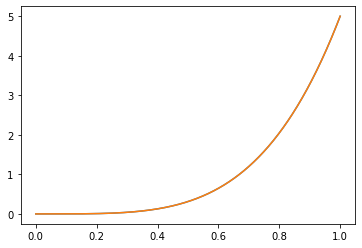

In [49]:
def p(x):
    return x**5
def derivative(x):
    return 5*x**4
plot_function(derivative(x), 0, 1)
plot_function(lambda x: 5*x**4, 0, 1)

### 연습문제 10.16 (Mini-project)
6장에서 한 것처럼, 벡터공간으로서 일변수함수들의 모임을 생각해보자. 앞에서 다룬 미분법을 이용하여 도함수 연산자가 이 벡터공간의 일차변환임을 설명하라. 구체적으로는 모든 점에서 도함수가 존재하는 함수로만 제한한다.

#### $f$와 $g$를 벡터로 보면 두 함수를 더하고 스칼라곱할 수 있다. $(f+g)(x) = f(x) + g(x)$이고 $(c \cdot f)(x) = c \cdot f(x)$임을 떠올려보기 바란다. 또한 일차변환은 벡터합과 스칼라곱을 보존하는 변환이다.
#### 도함수를 취하는 연산(the operation of taking derivative)을 연산자(operator) $D$로 표기할 때, $D$는 함수를 입력으로 받아 도함수를 출력으로 리턴한다고 생각할 수 있다. $DF = f^\prime$라고 표기하면 그렇게 보인다. 두 함수의 합에 대한 도함수는 각 함수의 도함수의 합인데, 다시 말해 다음이 성립한다.
$$ D(f+g) = Df + Dg$$
#### 어떤 함수에 수 $c$를 곱해 만든 함수의 도함수는 $c$와 원래 함수의 도함수를 곱한 것이다.
$$ D(c \cdot f) = c \cdot Df $$
#### 이 두 규칙은 $D$가 일차변환임을 의미한다. 특히 두 함수의 일차결합의 도함수가 각 도함수의 일차결합과 같음에 주목하라.
$$ D(a \cdot f + b \cdot g) = a \cdot Df + b \cdot Dg $$

### 연습문제 10.17 (Mini-project)
몫 $f(x)/g(x)$의 미분법 공식을 구하라.

#### $g(x)^-1$의 도함수는 합성함수의 미분법에 의해 $-g(x)^-2 \cdot g^\prime(x)$이다. 이를 다시 쓰면 다음과 같다.
$$ -\frac{g^\prime(x)}{g(x)^2} $$
#### 몫 $f(x)/g(x)$의 도함수는 곱 $f(x) \cdot g(x)^-1$의 도함수와 같아. 따라서 곱의 미분법을 적용하면 다음과 같다.
$$ f^\prime(x)g(x)^{-1} - \frac{g^\prime(x)}{g(x)^2}f(x) = \frac{f^\prime(x)}{g(x)} - \frac{f(x)g^\prime(x)}{g(x)^2} $$
#### 첫 번째 항의 분모, 분자에 $g(x)$를 곱하면 두 항의 분모가 같아지므로 두 항을 더할 수 있다.
$$ \frac{f^\prime(x)}{g(x)} - \frac{f(x)g^\prime(x)}{g(x)^2} = \frac{f^\prime(x)g(x)}{g(x)^2} - \frac{f(x)g^\prime(x)}{g(x)^2} = \frac{f^\prime(x)g(x) - f(x)g^\prime(x)}{g(x)^2} $$

### 연습문제 10.18
$\sin(x) \cdot \cos(x) \cdot \ln(x)$의 도함수를 구하라.

#### 이 식에는 두번의 곱셈이 있는데, 다행히도 어느 순서로 곱의 미분법을 적용해도 같은 결과를 얻는다. $\sin(x) \cdot \cos(x)$의 도함수는 다음과 같다.
$$ \sin(x) \cdot (-\sin(x)) + \cos(x) \cdot \cos(x) = \cos(x)^2 - \sin(x)^2 $$
#### $\ln(x)$의 도함수는 $1/x$이고 곱의 미분법을 이용하면 전체 곱의 도함수는 다음과 같다.
$$ \ln(x)(\cos(x)^2-\sin(x)^2) + \frac{\sin(x)\cos(x)}{x} $$

### 연습문제 10.19
세 함수 $f, g, h$의 각 도함수를 각각 $f^\prime, g^\prime, h^\prime$이라고 표기하기로 하자. $x$에 대한 $f(g(h(x)))$의 도함수를 구하라.

#### 합성함수의 미분법을 두 번 적용해야 한다. 합성함수의 미분법의 앞 부분은 $f^\prime(g(h(x)))$인데, 여기에 $g(h(x))$의 도함수를 곱해야 한다. 이 도함수는 $g^\prime(h(x))$에 안쪽 $h(x)$의 도함수를 곱한 것이다. $g(h(x))$의 도함수는 $h^\prime(x) \cdot g^\prime(h(x))$이므로, $f(g(h(x)))$의 도함수는 $h^\prime(x) \cdot g^\prime(h(x()) \cdot f^\prime(g(h(x)))$이다.

## 10.5 도함수 취하는 과정 자동화 하기

### 10.5.1 기호 수식의 도함수 구하는 법 구현하기

In [50]:
Sum(Variable("x"),Variable("c"),Number(1)).derivative(Variable("x"))

Sum(Number(1),Number(0),Number(0))

### 10.5.2 곱의 미분법과 합성함수의 미분법 구현하기

In [51]:
Product(Variable("c"),Variable("x")).derivative(Variable("x"))

Product(Variable("c"),Number(1))

In [52]:
Apply(Function("sin"),Power(Variable("x"),Number(2))).derivative(x)

Product(Product(Number(1),Product(Number(2),Power(Variable("x"),Number(1)))),Apply(Function("cos"),Power(Variable("x"),Number(2))))

### 10.5.3 거듭제곱의 미분법 구현하기

In [53]:
f_expression = Product( #<4>
                Sum(
                    Product(
                        Number(3),
                        Power(
                            Variable("x"),
                            Number(2))), 
                    Variable("x")), 
                Apply(
                    Function("sin"),
                    Variable("x")))

In [54]:
f_expression.derivative(x)

Sum(Product(Sum(Product(Number(3),Product(Number(1),Product(Number(2),Power(Variable("x"),Number(1))))),Number(1)),Apply(Function("sin"),Variable("x"))),Product(Sum(Product(Number(3),Power(Variable("x"),Number(2))),Variable("x")),Product(Number(1),Apply(Function("cos"),Variable("x")))))

### 10.5.4 연습문제

### 연습문제 10.20
우리의 코드는 어떤 수식 $f(x)$에 대해 $c \cdot f(x)$ 또는 $f(x) \cdot c$ 꼴의 곱을 다룰 수 있다. 두 경우 모두 도함수는 $c \cdot f^\prime(x)$이다. 그런데 곱의 미분법 공식에 대입할 때 $c$를 미분하고 $f(x)$를 곱한 $f(x) \cdot 0 = 0$은 필요가 없다. 곱의 도함수를 취하는 코드를 수정하여 결과가 0인 항을 포함하지 않고 나올 수 있도록 처리하라.

In [55]:
class Product(Expression):
    def derivative(self,var):
            if not contains(self.exp1, var):
                return Product(self.exp1, self.exp2.derivative(var))
            elif not contains(self.exp2, var):
                return Product(self.exp1.derivative(var), self.exp2)
            else:
                return Sum(
                    Product(self.exp1.derivative(var), self.exp2),
                    Product(self.exp1, self.exp2.derivative(var)))

### 연습문제 10.21
제곱근 함수를 특수 함수에 대한 딕셔너리에 추가해서 자동적으로 도함수를 취할 수 있도록 만들어라.

## 10.6 기호적으로 함수 적분하기

### 10.6.2 `SymPy` 라이브러리 소개

In [56]:
from sympy import *
from sympy.core.core import *
Mul(Symbol('y'),Add(3,Symbol('x')))

y*(x + 3)

In [57]:
y = Symbol('y')

In [58]:
x = Symbol('x')

In [59]:
y*(3+x)

y*(x + 3)

In [60]:
y*(3+x).subs(x,1)

4*y

In [61]:
(x**2).diff(x)

2*x

In [62]:
(3*x**2).integrate(x)

x**3

### 10.6.3 연습문제

### 연습문제 10.22
$f(x) = 0$의 부정적분을 구하라. `SymPy`로 구한 답을 확인하되 `SymPy`가 적분상수를 자동으로 포함하지 않음을 주의하라.

In [63]:
Integer(0).integrate(x)

0

### 연습문제 10.23
$x\cos(x)$의 부정적분을 구하라.

In [64]:
(x*cos(x)).integrate(x)

x*sin(x) + cos(x)

### 연습문제 10.24
$x^2$의 부정적분을 구하라. `SymPy`로 정답을 확인하라.

In [65]:
(x**2).integrate(x)

x**3/3